# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?
 

Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats




## Reading the Data into a DataFrame

In [ ]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/Python Course/abtest.csv" #load csv file from drive

# read the data
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#display first 5 rows of data
df.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#display last 5 rows of data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#check shape of data
df.shape

(100, 6)

Ther are 100 sets of data with 6 columns

In [ ]:
#description of data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

There are no duplicates because there are 100 user IDs and 100 datasets.

54 users are converted
average time spent on page is 5.38 minutes

median time spent on page is 5.415 minutes

Spanish is the most popular language preference with 34 users

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


No Null Values

In [ ]:
#The statistical summer for the language preference

df.groupby('language_preferred').describe()

user_id                                                 \
                     count           mean        std       min        25%   
language_preferred                                                          
English               32.0  546504.625000  45.658444  546443.0  546462.25   
French                34.0  546516.823529  52.009597  546445.0  546470.25   
Spanish               34.0  546528.823529  56.996794  546446.0  546479.50   

                                                  time_spent_on_the_page  \
                         50%        75%       max                  count   
language_preferred                                                         
English             546490.5  546550.25  546558.0                   32.0   
French              546524.5  546566.75  546575.0                   34.0   
Spanish             546534.0  546583.75  546592.0                   34.0   

                                                                            
                        mean       std   min     25%    50%     75%    max  
language_preferred                                                          
English             5.559062  2.621079  0.22  3.6175  5.755  7.1375  10.50  
French              5.253235  2.675413  0.40  3.3950  5.315  7.3675  10.71  
Spanish             5.331765  1.818095  0.19  4.4750  5.605  6.5150   8.72

Avereage time spent on page between the three groups ranges from 5.25 minutes to 5.56 minutes.

In [ ]:
#statistical summary of the categorical value converted.
df.groupby('converted').describe()

user_id                                                          \
            count           mean        std       min       25%       50%   
converted                                                                   
no           46.0  546532.782609  52.517474  546443.0  546481.0  546561.5   
yes          54.0  546503.555556  48.645296  546444.0  546464.5  546481.5   

                               time_spent_on_the_page                      \
                 75%       max                  count      mean       std   
converted                                                                   
no         546573.75  546592.0                   46.0  3.915870  2.226897   
yes        546552.75  546588.0                   54.0  6.623148  1.708427   

                                               
            min     25%    50%     75%    max  
converted                                      
no         0.19  2.3375  3.980  4.9225   9.15  
yes        2.58  5.5000  6.495  7.3675  10.71

The converted group spends more time on the page then the non-converted group.

54 people were converted

In [ ]:
# checking if there are any missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

No missing values

In [ ]:
#check for duplicate user records
df.duplicated(subset = 'user_id').sum()

0

There are no duplicate user records

### Univariate Analysis

##Time spent on the page

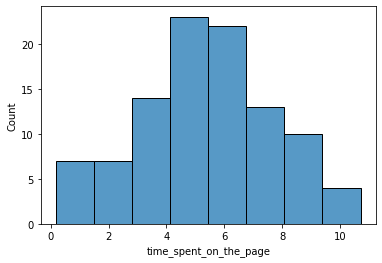

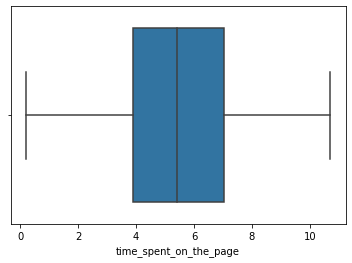

In [ ]:
sns.histplot(data=df, x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show()

#Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

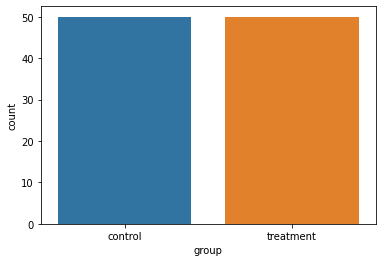

In [ ]:
#countplot to show how many people wer in the control group and treatment group.
sns.countplot(data=df, x='group')
plt.show()

#Landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

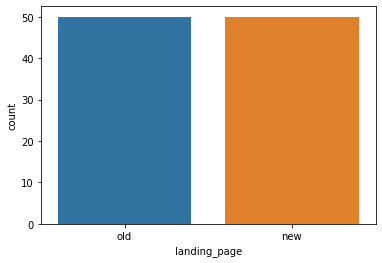

In [ ]:
#countplot to show the number of people on the new landing page and the old landing page.
sns.countplot(data=df, x = 'landing_page')
plt.show()

#Converted

In [ ]:
#count of people converted
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

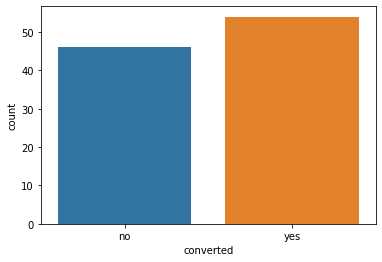

In [ ]:
#univariate look at converted yes or no

sns.countplot(data=df,x='converted')
plt.show()

#Language preferred

In [ ]:
#count of language preferrences
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

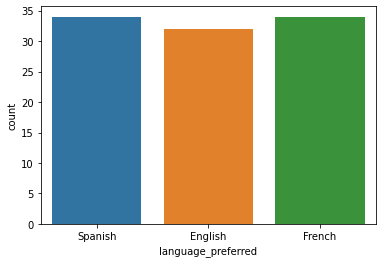

In [ ]:
#univariate look at language preferred

sns.countplot(data=df,x='language_preferred')
plt.show()

Observations:

1. population is 50/50 Control or Treatment
2. Population is 50/50 New or Old landing page
3. Time spent on the page is close to normal distribution
4. Median time on the page is over 5 minutes
5. 75% of users spend between 4 & 7 minutes on the page
6. A little over half the population is converted
7. There are three different languages: Spanish/French/Englist.  They are close to evenly distributed.

### Bivariate Analysis

#Landing page vs Time spend on the page

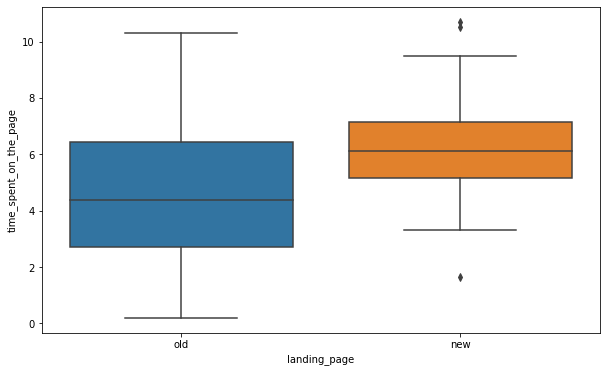

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.show()

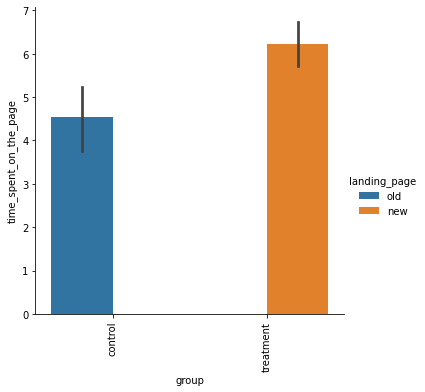

In [ ]:
#plot to show cuisine type and cost of order for the weekdays and weekends
sns.catplot(x='group', y='time_spent_on_the_page', data=df, kind="bar", hue='landing_page')
plt.xticks(rotation=90)
plt.show()

#Language preferred

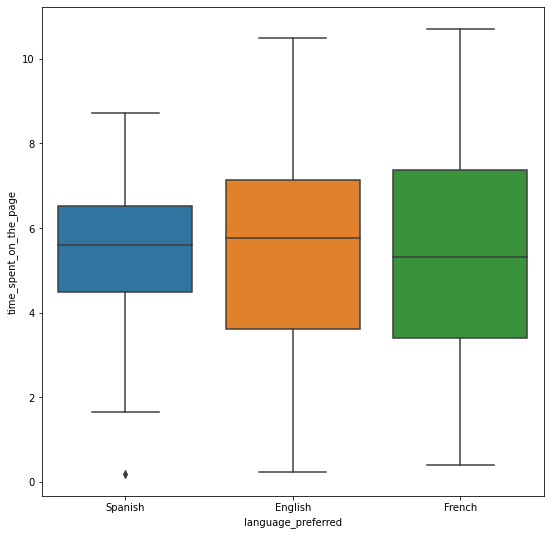

In [ ]:
#plot to show language preferred vs time spent on the page
plt.figure(figsize=(9,9))
sns.boxplot(data=df, x = 'language_preferred', y= 'time_spent_on_the_page')
plt.show()

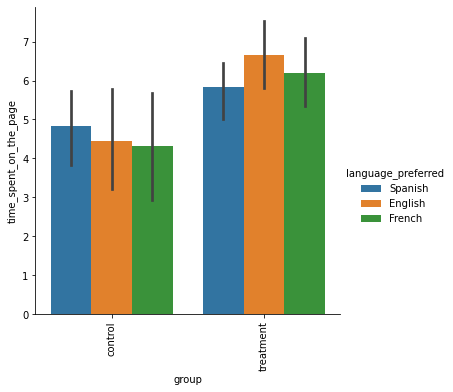

In [ ]:
#plot to show group, language and time spent on page
sns.catplot(x='group', y='time_spent_on_the_page', data=df, kind="bar", hue='language_preferred')
plt.xticks(rotation=90)
plt.show()

#Conversion status vs Time spent on the page

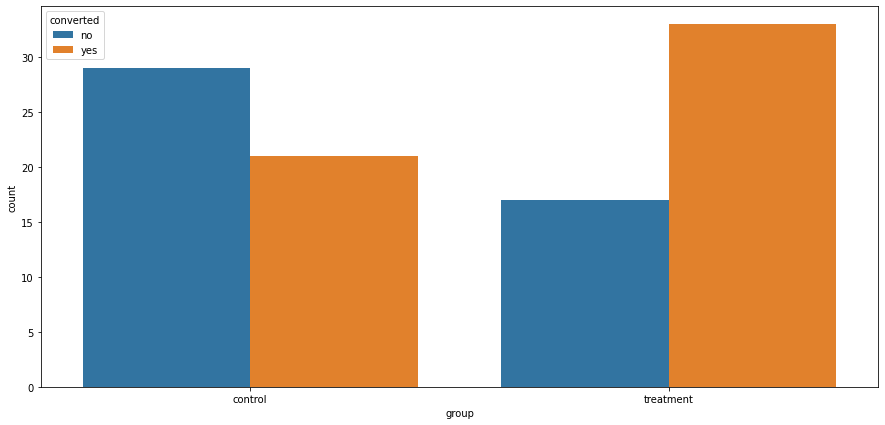

In [ ]:
#plot to show count of converted by group
plt.figure(figsize=(15, 7))
sns.countplot(data= df, x= "group", hue='converted');

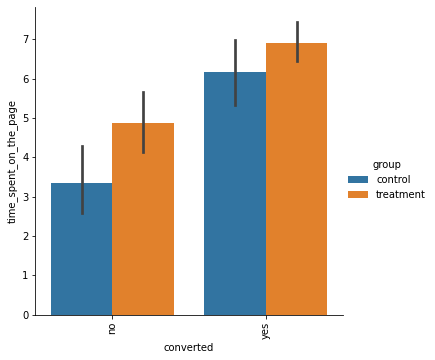

In [ ]:
#plot to show time spent in relation to converted
sns.catplot(x='converted', y='time_spent_on_the_page', data=df, kind="bar", hue='group')
plt.xticks(rotation=90)
plt.show()

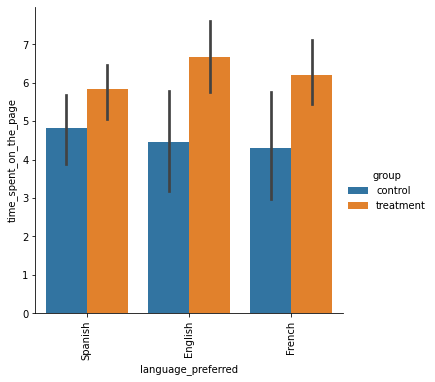

In [ ]:
#plot to show time spent in relation to language and group
sns.catplot(x='language_preferred', y='time_spent_on_the_page', data=df, kind="bar", hue='group')
plt.xticks(rotation=90)
plt.show()

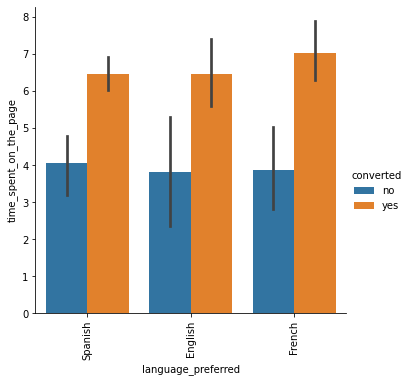

In [ ]:
#plot to show time spent in relation to language and converted or not
sns.catplot(x='language_preferred', y='time_spent_on_the_page', data=df, kind="bar", hue='converted')
plt.xticks(rotation=90)
plt.show()

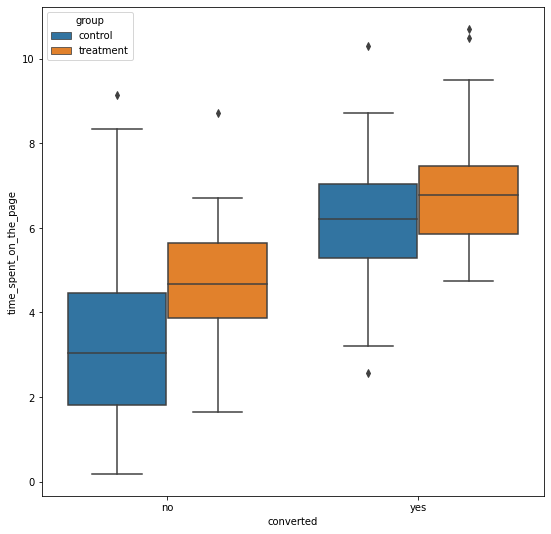

In [ ]:
#look at the relationship between converted vs time spent on the page
plt.figure(figsize=(9,9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page', hue = "group")
plt.show()

##Observations:

1. the treatment group spent more time on the page
2. More of the treatment group were converted
3. Converted group spent more time on the page
4. Language preference doesn't appear to affect conversion rate
5. Slight difference between language and time spent on page

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

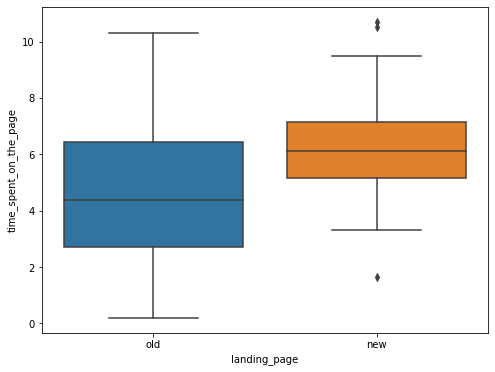

In [ ]:
#visual analysis of time spent on the new page and time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

### The null and alternative hypothesis

Let $\mu_1, \mu_2$ be the mean time spent on the existing landing page and the new landing page respectively.

We want to test whether there is an increase in the amount of time spent on the new landing page.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$

### Step 2: Select Appropriate test

# <a name='link9'>**Two Independent Sample T-test for Equality of Means - Unequal Std Dev**</a>

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use two sample T-test for this problem.

### Step 3: Decide the significance level

The significance level $\alpha$ in this test is 5% or 0.05 as per E-News

### Step 4: Collect and prepare data

In [ ]:
#create subsetted data frame for the control group and treatment group.
dfcontrol = df[df['group']=='control']
dftreatment = df[df['group']=='treatment']


diff = np.mean(dfcontrol['time_spent_on_the_page']) - np.mean(dftreatment['time_spent_on_the_page'])
print('The mean of the differences in time spent between the two pages is', diff)

The mean of the differences in time spent between the two pages is -1.6907999999999994


In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(dftreatment['time_spent_on_the_page'].std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(dfcontrol['time_spent_on_the_page'].std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(dfcontrol['time_spent_on_the_page'], dftreatment['time_spent_on_the_page'], equal_var = False,alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
alpha = 0.05

if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Insight
As the p-value is much less than the level of significance, the null hypothesis can be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that there is an increase in the time spent on the landing page from the existing to the new one.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

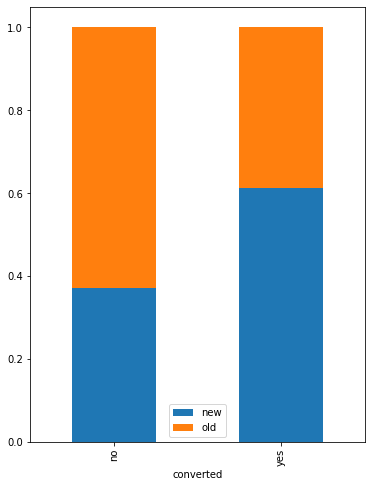

In [ ]:
#compare converion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'],df['landing_page'],normalize = 'index').plot(kind='bar', figsize=(6,8),stacked=True)
plt.legend()
plt.show()

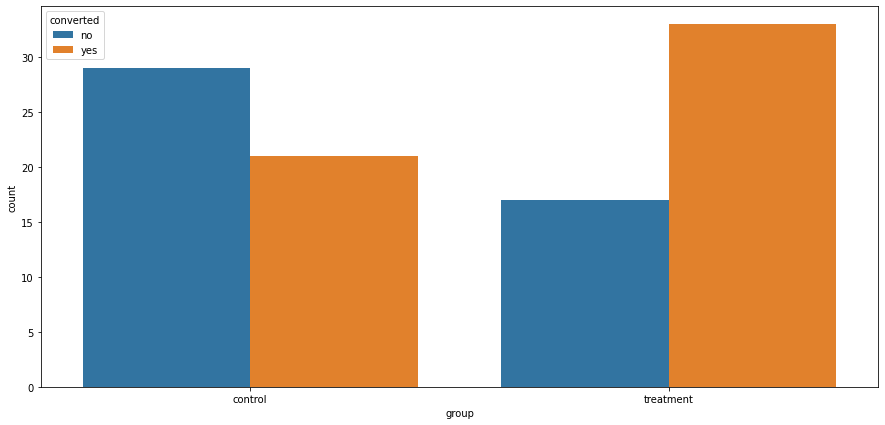

In [ ]:
#plot to show count of converted by group
plt.figure(figsize=(15, 7))
sns.countplot(data= df, x= "group", hue='converted');

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of converts in the control group and the treatment group respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 <\ p_2$

In [ ]:
#determine the number of users converted from each group.

controlconverted = dfcontrol[dfcontrol['converted']=='yes'].shape[0]
controlconverted #number of control group that converted

treatmentconverted = dftreatment[dftreatment['converted']=='yes'].shape[0]
treatmentconverted #number of treatment group that converted

print(f'The number of converted users from the control group was {controlconverted} and the number of users from the treatement group that were converted was {treatmentconverted}.')


The number of converted users from the control group was 21 and the number of users from the treatement group that were converted was 33.


### Let's test whether the 2 proportion Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $


The significance level $\alpha$ in this test is 5% or 0.05 as per E-News

### Calculate the p-value

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
defect_count = np.array([controlconverted, treatmentconverted])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs, alternative = 'smaller')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
alpha = 0.05

if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Insight
As the p-value is less than the level of significance, the null hypothesis can be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that a greater proportion was converted in the treatment group as opposed to the control group.

## 3. Is the conversion and preferred language are independent or related?

#Perform Visual analysis

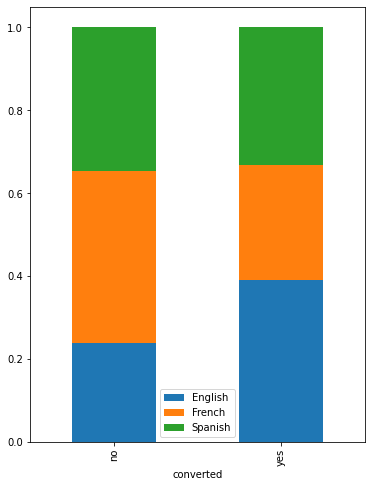

In [ ]:
#plot the dependency between conversion status and preferred language.
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar",figsize=(6,8), stacked = True)
plt.legend()
plt.show()

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Conversion rate is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion rate is dependent on preferred language.

# <a name='link14'>**Chi-Square Test for Independence**</a>

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

The significance level $\alpha$ in this test is 5% or 0.05 as per E-News

In [ ]:
#create a contingency table based on language preferred
data_crosstab = pd.crosstab(df['language_preferred'], 
                            df['converted'])
print(data_crosstab)


converted           no  yes
language_preferred         
English             11   21
French              19   15
Spanish             16   18


### Calculate the p-value

In [ ]:
# find the p-value

from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(data_crosstab)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
alpha = 0.05

if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Insight
As the p-value is greater than the level of significance, the null hypothesis cannot be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that conversion rate is independent of language preferred.

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
# get the number of users on the new page by language prefernce
dfnewpage = df[df['group']=='treatment']
dfnewpage['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

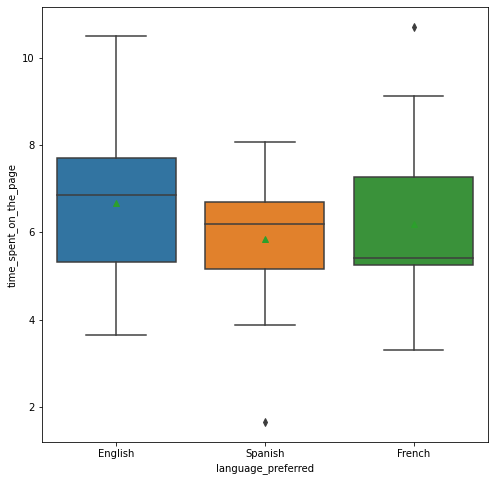

In [ ]:
#Plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = dfnewpage)
plt.show()

In [ ]:
#calculate the mean time spent on the new page for different language users
dfnewpage.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spend on the new landing page for languages Spanish, French and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language group is different in the amount of time spent on the new landing page than the others.

# <a name='link15'>**One-way ANOVA Test**</a>

The significance level $\alpha$ in this test is 5% or 0.05 as per E-News

#Collect and Prepare Data

The normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution against

the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(dfnewpage['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( dfnewpage['time_spent_on_the_page'][dfnewpage['language_preferred']=="Spanish"], 
                                   dfnewpage['time_spent_on_the_page'][dfnewpage['language_preferred']=="French"], 
                                   dfnewpage['time_spent_on_the_page'][dfnewpage['language_preferred']=="English"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than $\alpha$, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Find the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(dfnewpage.loc[dfnewpage['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              dfnewpage.loc[dfnewpage['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              dfnewpage.loc[dfnewpage['language_preferred'] == 'English', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


In [ ]:
# print the conclusion based on p-value
alpha = 0.05

if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Insight
As the p-value is greater than the level of significance, the null hypothesis cannot be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that the time spent on the page is equal for the different languages.

## Conclusion and Business Recommendations

* Users are spending more time on the new page


* The treatment group has a greater conversion rate than the control group


* Conversion rate is independent of the users preferred language


* Time spent on the new page is independent of preferred language


* Recommend switching all users to the new page for more conversions between all users.




___

In [ ]:
#code to convert to html
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Colab_Notebooks/ENews_Express_Learner_Notebook5BFull_Code_Version5D.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Colab_Notebooks/ENews_Express_Learner_Notebook5BFull_Code_Version5D.ipynb to html
[NbConvertApp] Writing 591613 bytes to ///content/drive/MyDrive/Colab_Notebooks/ENews_Express_Learner_Notebook5BFull_Code_Version5D.html
